In [1]:
# Standard code libraries
import numpy as np
from scipy.signal import find_peaks
import matplotlib.pyplot as plt

# Custom code libraries from the ReSurfEMG
import resurfemg.preprocessing.envelope as evl

%matplotlib widget

In [2]:
# Define signal
fs_emg = 2048
t_emg = np.array([s_t/fs_emg for s_t in range(3*fs_emg)])
x_sin = np.sin(t_emg * 2 * np.pi)
x_sin[x_sin < 0] = 0
x_rand = np.random.normal(0, 1, size=len(x_sin))
x_t = x_sin * x_rand

In [3]:
# Get RMS signal
window_s = fs_emg // 5  # 200 ms --> Delay of 100 ms
x_rms = evl.full_rolling_rms(x_t, window_s)
x_arv = evl.full_rolling_arv(x_t, window_s)

# Find peaks in source, original RMS signal, and new RMS signal
peak_idxs_source, _ = find_peaks(x_sin, prominence=0.1)
peak_idxs_rms, _ = find_peaks(x_rms, prominence=0.1)
peak_idxs_arv, _ = find_peaks(x_arv, prominence=0.1)

# Check whether any peak errors are > 0.05 s
peak_errors_rms = np.abs((t_emg[peak_idxs_rms] - t_emg[peak_idxs_source]))
peak_errors_arv = np.abs((t_emg[peak_idxs_arv] - t_emg[peak_idxs_source]))
np.any(peak_errors_rms > 0.05), np.any(peak_errors_arv > 0.05)

(False, False)

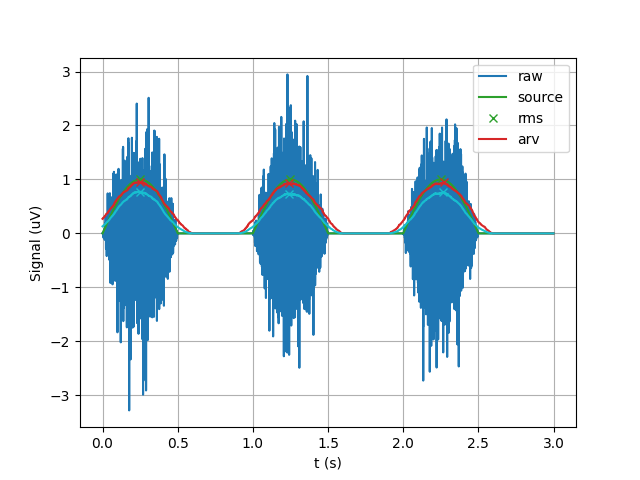

In [4]:
# Plot the raw data
fig, axis = plt.subplots(nrows=1, ncols=1)
axis.grid
axis.grid(True)
axis.plot(t_emg, x_t, color='tab:blue')
axis.plot(t_emg, x_sin, color='tab:green')
axis.plot(t_emg[peak_idxs_source], x_sin[peak_idxs_source], 'x', color='tab:green')
axis.plot(t_emg, x_rms, color='tab:red')
axis.plot(t_emg[peak_idxs_rms], x_rms[peak_idxs_rms],
          'x', color='tab:red')
axis.plot(t_emg, x_arv, color='tab:cyan')
axis.plot(t_emg[peak_idxs_arv], x_arv[peak_idxs_arv],
          'x', color='tab:cyan')
axis.set_xlabel('t (s)')
axis.set_ylabel('Signal (uV)')
axis.legend(['raw', 'source', 'rms', 'arv'])